In [34]:
import requests
import time

def get_anime_episodes(anime_id, season_num, previous_seasons=None):
    # Jikan API base URL for episodes
    url_template = f"https://api.jikan.moe/v4/anime/{anime_id}/episodes"
    episodes = []
    offset = 0

    # Calculate the offset based on the last episode of previous seasons
    if previous_seasons:
        offset = previous_seasons[-1][-1]["episode_number"]

    page = 1
    while True:
        # Use f-string for URL formatting
        url = f"{url_template}?page={page}"
        response = requests.get(url)
        print(f"Requested: {url}")
        time.sleep(1)  # Respect API rate limits
        if response.status_code != 200:
            print(f"Error: {response.status_code}")
            break

        data = response.json()
        for ep in data.get("data", []):
            episodes.append({
                "season": season_num,
                "episode_number": offset + ep["mal_id"], 
                "title": ep["title"]
            })

        # Check if more pages exist
        if not data.get("pagination", {}).get("has_next_page"):
            break

        page += 1

    return episodes

# Combine episodes from all seasons into one list
anime_id_season_1 = 40748
anime_id_season_2 = 51009

season_1_episodes = get_anime_episodes(anime_id_season_1, season_num=1)
season_2_episodes = get_anime_episodes(anime_id_season_2, season_num=2, previous_seasons=[season_1_episodes])

# Combine both seasons
all_episodes = season_1_episodes + season_2_episodes

# Print combined episodes
for ep in all_episodes:
    print(f"Season {ep['season']}, Episode {ep['episode_number']}: {ep['title']}")

Requested: https://api.jikan.moe/v4/anime/40748/episodes?page=1
Requested: https://api.jikan.moe/v4/anime/51009/episodes?page=1
Season 1, Episode 1: Ryomen Sukuna
Season 1, Episode 2: For Myself
Season 1, Episode 3: Girl of Steel
Season 1, Episode 4: Curse Womb Must Die
Season 1, Episode 5: Curse Womb Must Die II
Season 1, Episode 6: After Rain
Season 1, Episode 7: Assault
Season 1, Episode 8: Boredom
Season 1, Episode 9: Small Fry and Reverse Retribution
Season 1, Episode 10: Idle Transfiguration
Season 1, Episode 11: Narrow-minded
Season 1, Episode 12: To You, Someday
Season 1, Episode 13: Tomorrow
Season 1, Episode 14: Kyoto Sister School Exchange Event - Group Battle 0 -
Season 1, Episode 15: Kyoto Sister School Exchange Event - Group Battle 1 -
Season 1, Episode 16: Kyoto Sister School Exchange Event - Group Battle 2 -
Season 1, Episode 17: Kyoto Sister School Exchange Event - Group Battle 3 -
Season 1, Episode 18: Sage
Season 1, Episode 19: Black Flash
Season 1, Episode 20: Nonst

In [44]:
#FITER FILLER
pass

In [40]:
from bs4 import BeautifulSoup
import requests

def get_episode_characters(episode_url):
    # Fetch the episode page
    response = requests.get(episode_url)
    if response.status_code != 200:
        print(f"Failed to fetch the episode page: {response.status_code}")
        return []
    
    soup = BeautifulSoup(response.text, "html.parser")
    characters = []
    
    # Locate the <span> with id="Characters_in_Order_of_Appearance"
    heading = soup.find("span", id="Characters_in_Order_of_Appearance")
    if heading:
        # Find the parent <h2>, then the next sibling
        h2 = heading.find_parent("h2")
        if h2:
            next_element = h2.find_next_sibling()
            # Check if the next element is <ul> or <div> with <ul>
            if next_element.name == "ul":
                ul = next_element
            elif next_element.name == "div":
                ul = next_element.find("ul")
            else:
                ul = None

            # Extract characters from the <ul>
            if ul:
                for li in ul.find_all("li"):
                    a_tag = li.find("a")
                    # If <a> tag exists, get its text, otherwise get the plain <li> text
                    character_name = a_tag.text.strip() if a_tag else li.text.strip()
                    characters.append(character_name)
            else:
                print("Character list not found after heading.")
        else:
            print("Parent <h2> not found for the heading.")
    else:
        print("Heading 'Characters in Order of Appearance' not found.")
    
    return characters

def get_episode_urls(all_episodes):
    # Construct URLs based on episode titles for the Fandom Wiki
    base_url = "https://jujutsu-kaisen.fandom.com/wiki/Episode_"
    episode_urls = []
    for ep in all_episodes:
        episode_number = ep["episode_number"]
        # Assuming episode titles are not used in the URL
        episode_urls.append({"episode": f"Season {ep['season']}, Episode {episode_number}", "url": f"{base_url}{episode_number}"})
    return episode_urls


episode_urls = get_episode_urls(all_episodes)

# Fetch characters for each episode
all_episode_characters = {}
for ep in episode_urls:
    print(f"Fetching characters for {ep['episode']}...")
    characters = get_episode_characters(ep["url"])
    all_episode_characters[ep["episode"]] = characters


Fetching characters for Season 1, Episode 1...
Fetching characters for Season 1, Episode 2...
Fetching characters for Season 1, Episode 3...
Fetching characters for Season 1, Episode 4...
Fetching characters for Season 1, Episode 5...
Fetching characters for Season 1, Episode 6...
Fetching characters for Season 1, Episode 7...
Fetching characters for Season 1, Episode 8...
Fetching characters for Season 1, Episode 9...
Fetching characters for Season 1, Episode 10...
Fetching characters for Season 1, Episode 11...
Fetching characters for Season 1, Episode 12...
Fetching characters for Season 1, Episode 13...
Fetching characters for Season 1, Episode 14...
Fetching characters for Season 1, Episode 15...
Fetching characters for Season 1, Episode 16...
Fetching characters for Season 1, Episode 17...
Fetching characters for Season 1, Episode 18...
Fetching characters for Season 1, Episode 19...
Fetching characters for Season 1, Episode 20...
Fetching characters for Season 1, Episode 21...
F

In [47]:
all_episode_characters

{'Season 1, Episode 1': ['Yuji Itadori',
  'Satoru Gojo',
  'Wasuke Itadori',
  'Megumi Fushiguro',
  'Setsuko Sasaki',
  'Takeshi Iguchi',
  'Takagi',
  'Maki Zenin',
  'Sukuna'],
 'Season 1, Episode 2': ['Megumi Fushiguro',
  'Yuji Itadori',
  'Sukuna',
  'Satoru Gojo',
  'Yoshinobu Gakuganji',
  'Setsuko Sasaki',
  'Takeshi Iguchi',
  'Masamichi Yaga',
  'Nobara Kugisaki'],
 'Season 1, Episode 3': ['Yuji Itadori',
  'Megumi Fushiguro',
  'Satoru Gojo',
  'Nobara Kugisaki',
  'Sukuna',
  'Saori',
  'Kiyotaka Ijichi',
  'Tadashi Okazaki'],
 'Season 1, Episode 4': ['Yuji Itadori',
  'Megumi Fushiguro',
  'Nobara Kugisaki',
  'Kiyotaka Ijichi',
  "Tadashi's Mother",
  'Satoru Gojo',
  'Tadashi Okazaki',
  'Finger Bearer',
  'Sukuna',
  'Setsuko Sasaki',
  'Takeshi Iguchi',
  'Masamichi Yaga',
  'Wasuke Itadori'],
 'Season 1, Episode 5': ['Sukuna',
  'Megumi Fushiguro',
  'Tsumiki Fushiguro',
  'Yuji Itadori',
  'Pseudo-Geto',
  'Jogo',
  'Hanami',
  'Dagon',
  'Kiyotaka Ijichi',
  'Sato

In [77]:
'''
{'Season 1, Episode 1': ['Yuji Itadori',
  'Satoru Gojo',
  'Wasuke Itadori',
  'Megumi Fushiguro',
  'Setsuko Sasaki',
  'Takeshi Iguchi',
  'Takagi',
  'Maki Zenin',
  'Sukuna'],
  . . . 
  will turn to 
  where 1 is they appear and 0 is they do not appear
{Satoru Gojo: [1, 1,, 0, 0 ...], Wasuke Itadori: [1,0, 1, 0...]}
'''
# Get a sorted list of all episode numbers
all_episode_numbers = sorted(
    int(episode.split(", Episode ")[1]) for episode in all_episode_characters.keys()
)

# Initialize a dictionary to store binary representation for each character
characters_episodes = {}

# Iterate through all episodes and their character lists
for episode, characters in all_episode_characters.items():
    # Extract the episode number
    episode_number = int(episode.split(", Episode ")[1])
    
    for character in characters:
        # If the character is not in the dictionary, initialize with a list of 0s
        if character not in characters_episodes:
            characters_episodes[character] = [0] * len(all_episode_numbers)
            # print(f"New character {character} added.")
        # Mark the character as present (1) in the current episode
        characters_episodes[character][all_episode_numbers.index(episode_number)] = 1
        # print(f"Added {character} to Episode {episode_number}")

# Output the resulting dictionary
characters_episodes

{'Yuji Itadori': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'Satoru Gojo': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'Wasuke Itadori': [1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0],
 'Megumi Fushiguro': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0

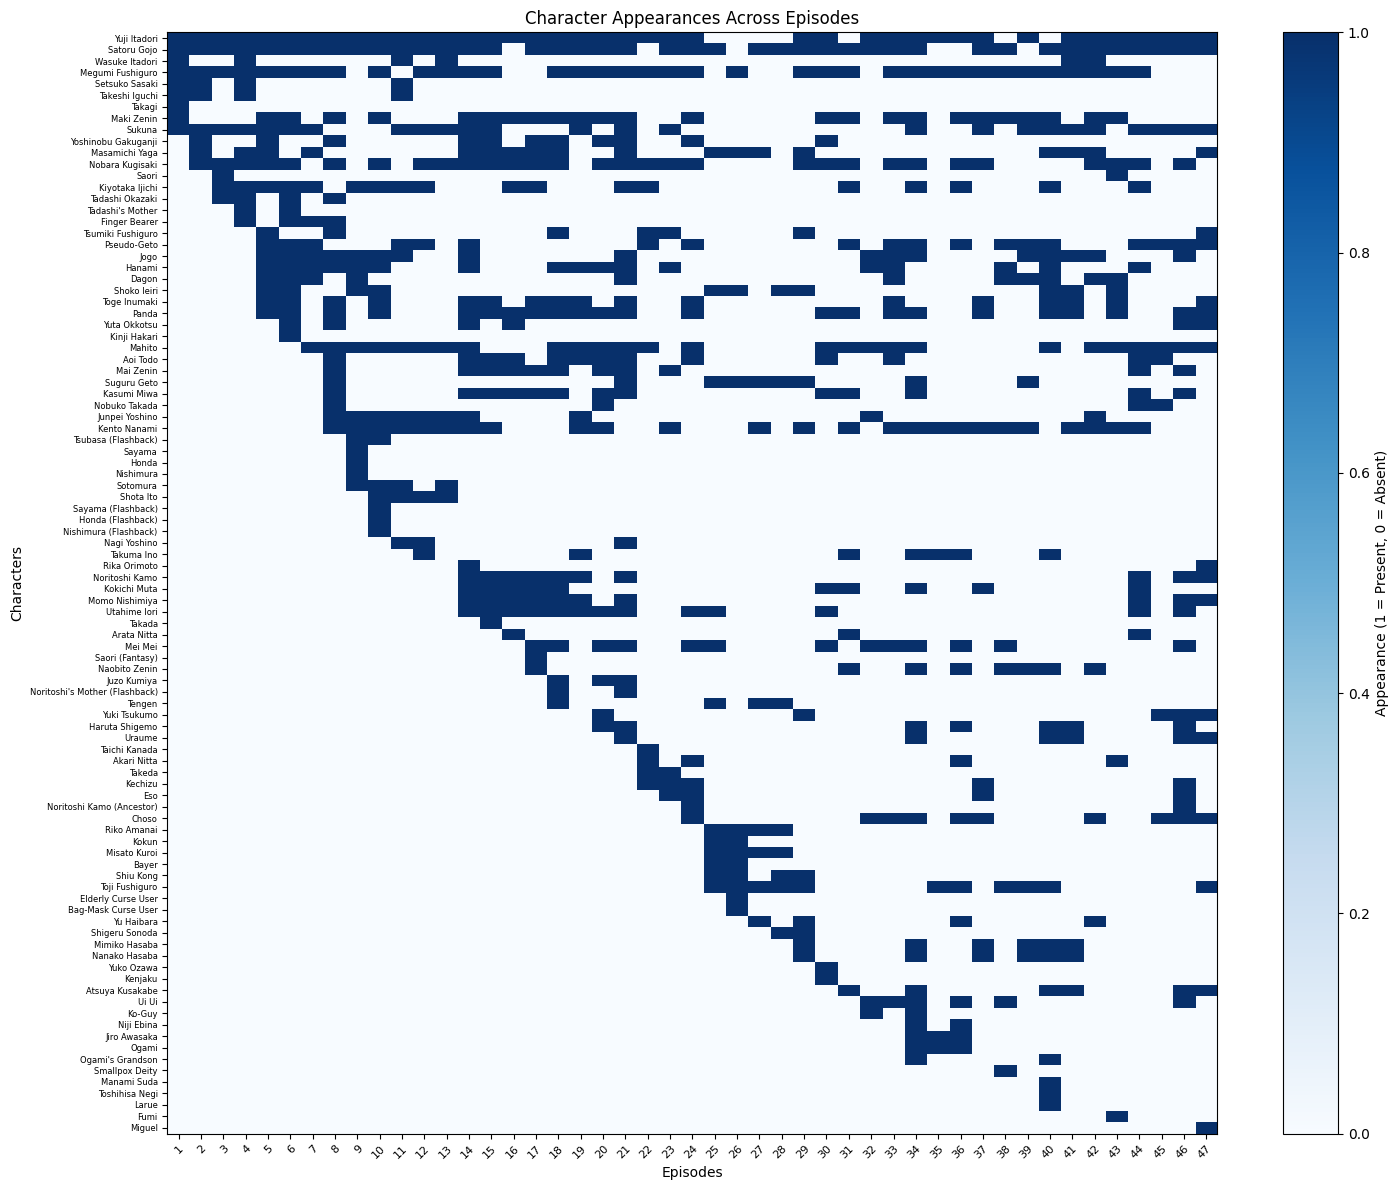

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data structure (you need to replace this with your data)
# Example structure: {'Character1': [1, 0, 1], 'Character2': [0, 1, 1], ...}
data = characters_episodes

# Convert data to a matrix for easier visualization
characters = list(data.keys())
episodes = range(1, len(next(iter(data.values()))) + 1)
matrix = np.array([data[char] for char in characters])

# Adjust figure size to reduce clutter
fig, ax = plt.subplots(figsize=(15, 12))
im = ax.imshow(matrix, cmap="Blues", aspect="auto")

# Set ticks and labels
ax.set_xticks(np.arange(len(episodes)))
ax.set_yticks(np.arange(len(characters)))
ax.set_xticklabels([f"{ep}" for ep in episodes], fontsize=8)
ax.set_yticklabels(characters, fontsize=6)

# Rotate the tick labels and set alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add gridlines
ax.grid(visible=False)

# Add a colorbar
plt.colorbar(im, label="Appearance (1 = Present, 0 = Absent)")

# Set titles and labels
plt.title("Character Appearances Across Episodes", fontsize=12)
plt.xlabel("Episodes", fontsize=10)
plt.ylabel("Characters", fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()

# Show the graph
plt.show()

Takagi with 1 and Kinji Hakari with 1
Takagi with 1 and Sayama with 1
Takagi with 1 and Honda with 1
Takagi with 1 and Nishimura with 1
Takagi with 1 and Sayama (Flashback) with 1
Takagi with 1 and Honda (Flashback) with 1
Takagi with 1 and Nishimura (Flashback) with 1
Takagi with 1 and Takada with 1
Takagi with 1 and Saori (Fantasy) with 1
Takagi with 1 and Taichi Kanada with 1
Takagi with 1 and Elderly Curse User with 1
Takagi with 1 and Bag-Mask Curse User with 1
Takagi with 1 and Yuko Ozawa with 1
Takagi with 1 and Kenjaku with 1
Takagi with 1 and Smallpox Deity with 1
Takagi with 1 and Manami Suda with 1
Takagi with 1 and Toshihisa Negi with 1
Takagi with 1 and Larue with 1
Takagi with 1 and Fumi with 1
Takagi with 1 and Miguel with 1
Kinji Hakari with 1 and Sayama with 1
Kinji Hakari with 1 and Honda with 1
Kinji Hakari with 1 and Nishimura with 1
Kinji Hakari with 1 and Sayama (Flashback) with 1
Kinji Hakari with 1 and Honda (Flashback) with 1
Kinji Hakari with 1 and Nishimura (

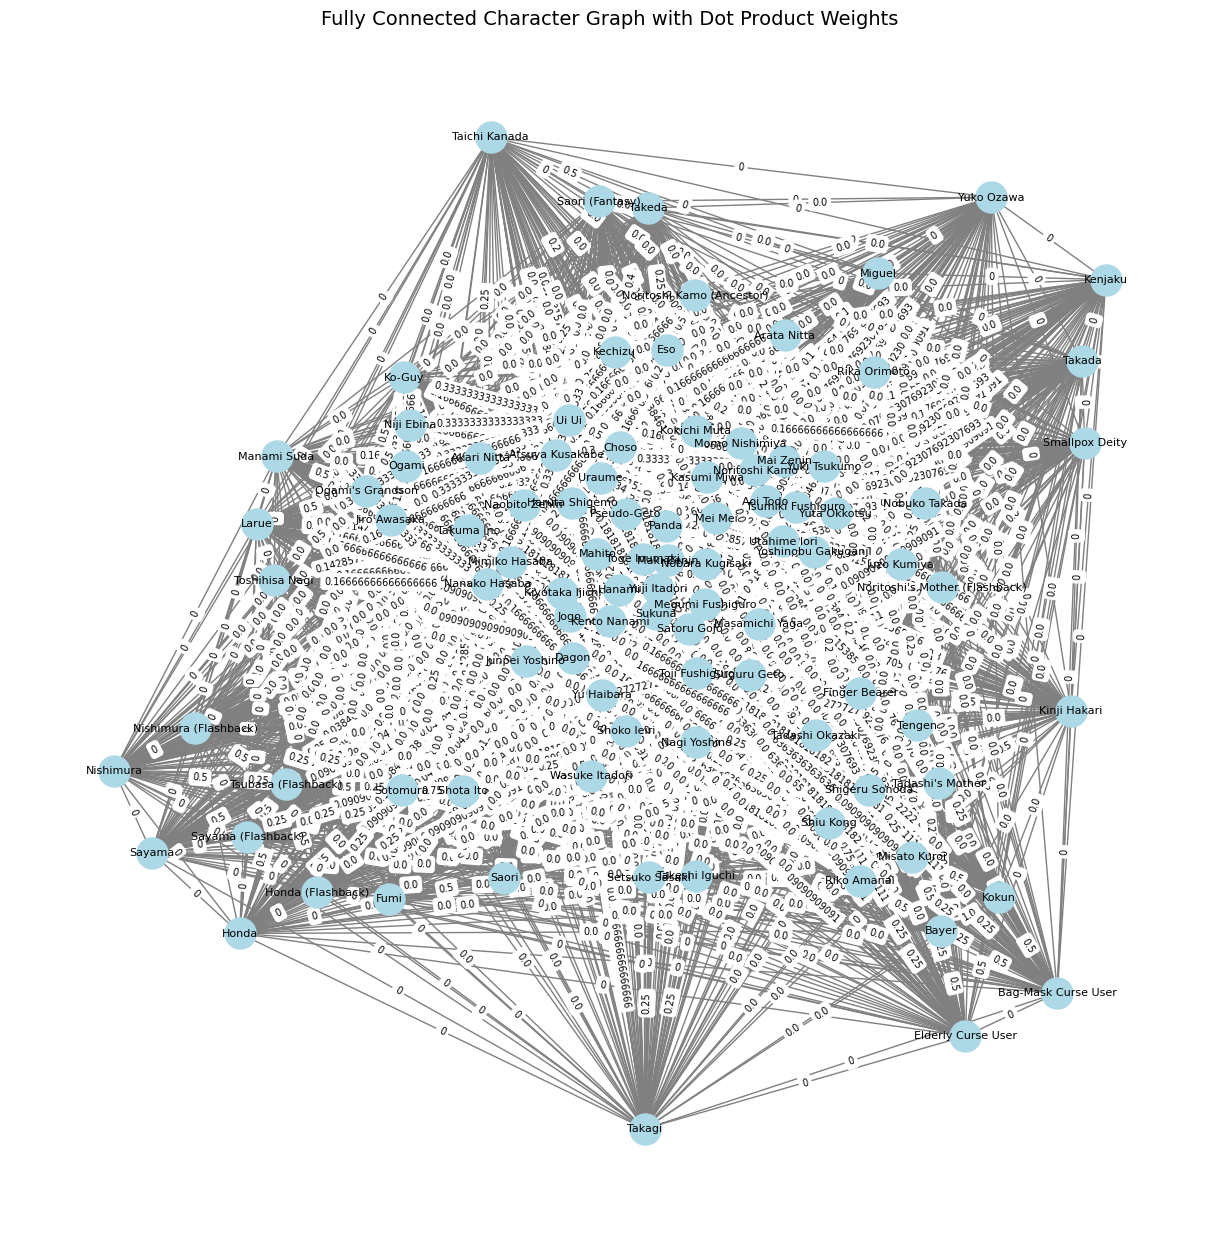

In [143]:
import networkx as nx
import numpy as np


# Initialize the graph
anime_network = nx.Graph()

# Add nodes for each character
for character in characters_episodes.keys():
    anime_network.add_node(character)

# Add edges with weights (dot products) between all pairs of characters
characters = list(characters_episodes.keys())
for i, char1 in enumerate(characters):
    for j, char2 in enumerate(characters):
        if i < j:  # Avoid duplicate edges and self-loops
            # Compute the dot product of their episode lists
            # print((sum(characters_episodes[char1]) + sum(characters_episodes[char2]))>0)
            if (sum(characters_episodes[char1]) + sum(characters_episodes[char2]))>2:
                val = np.dot(characters_episodes[char1], characters_episodes[char2])/max(sum(characters_episodes[char1]), sum(characters_episodes[char2]))
            else:
                val = 0
                print(f"{char1} with {sum(characters_episodes[char1])} and {char2} with {sum(characters_episodes[char2])}")
            # Add the edge with the dot product as the weight
            anime_network.add_edge(char1, char2, weight=val)


# Visualize the graph (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))  # Increase the figure size
pos = nx.spring_layout(anime_network)  # Layout for the graph
nx.draw(
    anime_network,
    pos,
    with_labels=True,
    node_color="lightblue",
    node_size=500,  # Reduce node size
    font_size=8,    # Reduce font size for readability
    edge_color="gray",
)
edge_labels = nx.get_edge_attributes(anime_network, "weight")
nx.draw_networkx_edge_labels(anime_network, pos, edge_labels=edge_labels, font_size=7)  # Reduce edge label font size
plt.title("Fully Connected Character Graph with Dot Product Weights", fontsize=14)
plt.show()

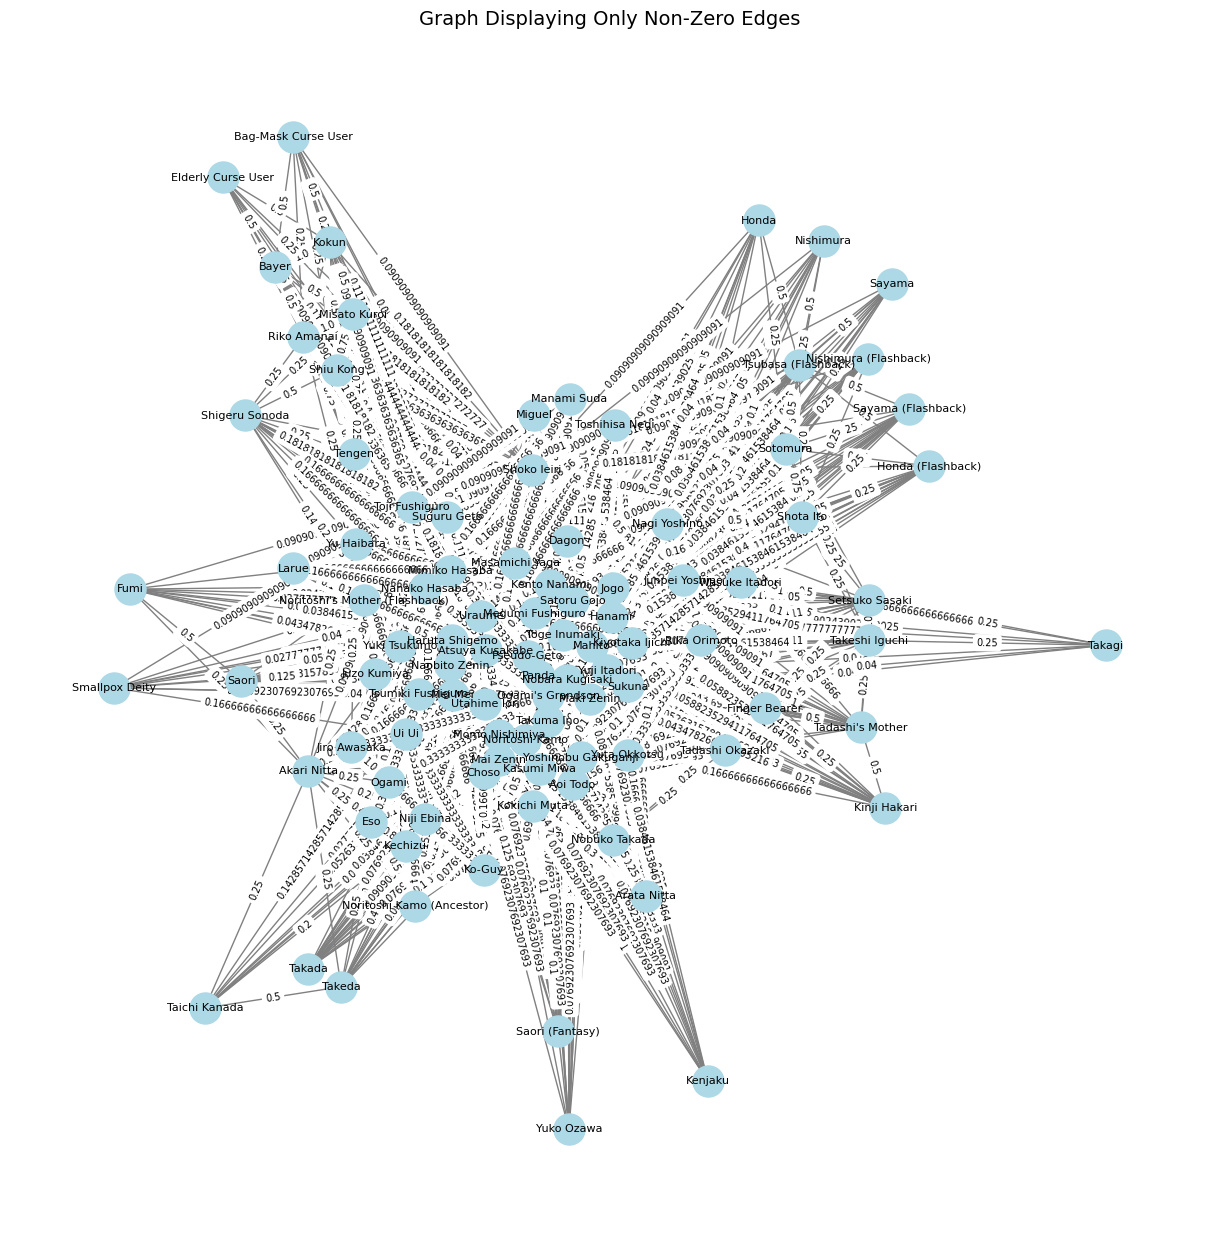

In [144]:
# Create a subgraph with only non-zero edges
non_zero_edges = [(u, v, d) for u, v, d in anime_network.edges(data=True) if d["weight"] > 0]
H = nx.Graph()
H.add_edges_from(non_zero_edges)

# Add nodes to the subgraph to include isolated nodes
H.add_nodes_from(anime_network.nodes)

# Visualize the subgraph with non-zero edges
plt.figure(figsize=(12, 12))  # Increase the figure size
pos = nx.spring_layout(H)  # Layout for the graph
nx.draw(
    H,
    pos,
    with_labels=True,
    node_color="lightblue",
    node_size=500,  # Reduce node size
    font_size=8,    # Reduce font size for readability
    edge_color="gray",
)
edge_labels = nx.get_edge_attributes(H, "weight")
nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels, font_size=7)  # Reduce edge label font size
plt.title("Graph Displaying Only Non-Zero Edges", fontsize=14)
plt.show()

In [145]:
def relation_val(char1, char2):
    return anime_network[char1][char2]['weight']

def get_top_largest_edges(graph, top_n=5):
    """
    Returns the top `top_n` largest edges by weight in the graph.

    Args:
        graph (nx.Graph): The input graph with weighted edges.
        top_n (int): Number of largest edges to return.

    Returns:
        List[Tuple[str, str, int]]: A list of tuples where each tuple contains
                                    two nodes and the weight of the edge.
    """
    # Extract edges with weights and sort by weight in descending order
    edges = [(u, v, d["weight"]) for u, v, d in graph.edges(data=True)]
    edges_sorted = sorted(edges, key=lambda x: x[2], reverse=True)

    # Return the top `top_n` edges
    return edges_sorted[:top_n]

In [146]:
# Yuji Itadori
# Satoru Gojo
# Wasuke Itadori
# relation_val("Yuji Itadori", "Wasuke Itadori")



# Example Usage
top_edges = get_top_largest_edges(anime_network, top_n=10)
print("Top 5 largest edges:")
for u, v, weight in top_edges:
    print(f"{u} -- {v} with weight {weight}")

Top 5 largest edges:
Setsuko Sasaki -- Takeshi Iguchi with weight 1.0
Noritoshi Kamo -- Momo Nishimiya with weight 1.0
Riko Amanai -- Misato Kuroi with weight 1.0
Kokun -- Bayer with weight 1.0
Mimiko Hasaba -- Nanako Hasaba with weight 1.0
Jiro Awasaka -- Ogami with weight 1.0
Yuji Itadori -- Satoru Gojo with weight 0.8536585365853658
Uraume -- Atsuya Kusakabe with weight 0.8333333333333334
Yuji Itadori -- Megumi Fushiguro with weight 0.8
Maki Zenin -- Panda with weight 0.8


In [147]:
# Cut off
# 1.	Sort edges by weight in ascending order.
# 2.	Iteratively remove edges from the graph starting with the lowest weight.
# 3.	Check if the graph is still connected (using nx.is_connected()).
# 4.	Stop when removing the next edge would disconnect the graph.
# 5.	The last removed edge’s weight before disconnection is the cutoff.



def find_max_cutoff_for_connected_graph(graph):
    """
    Finds the maximum weight cutoff such that removing all edges with weight <= cutoff
    keeps the graph connected but not fully connected.
    
    Args:
        graph (nx.Graph): Input graph with weighted edges.
    
    Returns:
        float: The maximum weight cutoff.
    """
    # Sort edges by weight in ascending order
    edges_sorted = sorted(graph.edges(data=True), key=lambda x: x[2]["weight"])
    
    for i, (u, v, data) in enumerate(edges_sorted):
        # Create a copy of the graph to test edge removal
        graph_copy = graph.copy()
        
        # Remove edges with weight <= current edge weight
        edges_to_remove = [(x, y) for x, y, d in edges_sorted[:i+1]]
        graph_copy.remove_edges_from(edges_to_remove)
        
        # Check if the graph is still connected
        if not nx.is_connected(graph_copy):
            # Return the weight of the last edge before disconnection
            return edges_sorted[i - 1][2]["weight"] if i > 0 else 0
    
    # If all edges are removed and the graph is still connected
    return edges_sorted[-1][2]["weight"]

# Example usage
max_cutoff = find_max_cutoff_for_connected_graph(anime_network)
print(f"The maximum weight cutoff to keep the graph connected: {max_cutoff}")

The maximum weight cutoff to keep the graph connected: 0.1


In [148]:
def find_max_cutoff_and_percentages(graph):
    """
    Finds the maximum weight cutoff such that removing all edges with weight <= cutoff
    keeps the graph connected. Calculates the percentage of edges removed and the cutoff.

    Args:
        graph (nx.Graph): Input graph with weighted edges.

    Returns:
        dict: Contains maximum weight cutoff, percentage of edges removed, and percentage cutoff.
    """
    # Sort edges by weight in ascending order
    edges_sorted = sorted(graph.edges(data=True), key=lambda x: x[2]["weight"])
    total_edges = len(edges_sorted)  # Total number of edges in the graph

    for i, (u, v, data) in enumerate(edges_sorted):
        # Create a copy of the graph to test edge removal
        graph_copy = graph.copy()
        
        # Remove edges with weight <= current edge weight
        edges_to_remove = [(x, y) for x, y, d in edges_sorted[:i+1]]
        graph_copy.remove_edges_from(edges_to_remove)
        
        # Check if the graph is still connected
        if not nx.is_connected(graph_copy):
            # Get the weight of the last edge before disconnection
            cutoff_weight = edges_sorted[i - 1][2]["weight"] if i > 0 else 0
            
            # Calculate the percentage of edges removed
            edges_removed = len(edges_to_remove) - 1  # Exclude the edge that causes disconnection
            percentage_removed = (edges_removed / total_edges) * 100
            
            
            return {
                "max_cutoff_weight": cutoff_weight,
                "percentage_links_removed": percentage_removed
            }

    # If all edges are removed and the graph is still connected
    return {
        "max_cutoff_weight": edges_sorted[-1][2]["weight"],
        "percentage_links_removed": 100
    }

# Example usage
result = find_max_cutoff_and_percentages(anime_network)
print(f"Maximum weight cutoff: {result['max_cutoff_weight']}")
print(f"Percentage of links removed: {result['percentage_links_removed']:.2f}%")

Maximum weight cutoff: 0.1
Percentage of links removed: 73.90%
Percentage cutoff: 73.90%
